# Part II: Time Series

In [54]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller

In [5]:
# load data

df = pd.read_csv("MonthWiseMarketArrivals_clean.csv")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [6]:
# Exploring data

df.shape

(10227, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [8]:
# DataTypes of columns

df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [9]:
df.describe(include="all")

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
count,10227,10227,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000,10227,10227,10227
unique,120,12,NaN,NaN,NaN,NaN,NaN,21,117,242
top,LASALGAON(MS),February,NaN,NaN,NaN,NaN,NaN,MS,LASALGAON,September-2015
freq,242,930,NaN,NaN,NaN,NaN,NaN,4354,242,97
mean,NaN,NaN,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345,NaN,NaN,NaN
std,NaN,NaN,4.372841,1.244087e+05,673.121850,979.658874,818.471498,NaN,NaN,NaN
min,NaN,NaN,1996.000000,2.000000e+01,16.000000,145.000000,80.000000,NaN,NaN,NaN
25%,NaN,NaN,2006.000000,8.898000e+03,209.000000,557.000000,448.000000,NaN,NaN,NaN
50%,NaN,NaN,2009.000000,2.746000e+04,440.000000,923.000000,747.000000,NaN,NaN,NaN
75%,NaN,NaN,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000,NaN,NaN,NaN


In [31]:
df = df.drop(columns = ["year", "state", ], axis  = 1)

In [30]:
df.index = pd.PeriodIndex(df.date, freq="M")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


# Quesion 1

### Price of onion for each month for mumbai market


In [32]:
df_mumbai = df.loc[df.city == "MUMBAI"].copy()
df_mumbai.head()

,market,month,quantity,priceMin,priceMax,priceMod,city,date
date,,,,,,,,
2004-01,MUMBAI,January,267100,719,971,849,MUMBAI,2004-01-01
2005-01,MUMBAI,January,275845,261,513,387,MUMBAI,2005-01-01
2006-01,MUMBAI,January,228000,315,488,402,MUMBAI,2006-01-01
2007-01,MUMBAI,January,205200,866,1136,997,MUMBAI,2007-01-01
2008-01,MUMBAI,January,267550,348,550,448,MUMBAI,2008-01-01


In [33]:
df_mum = df_mumbai.groupby("month").sum()
df_mum[["priceMod"]]

,priceMod
month,
April,7579
August,17129
December,15826
February,11245
January,14185
July,12578
June,10615
March,8092
May,8156


In [34]:
df_mumbai = df_mumbai.drop(columns = ["quantity"], axis  = 1)

<AxesSubplot:ylabel='Frequency'>

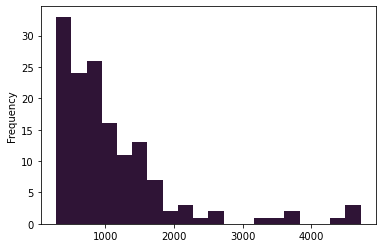

In [37]:
df_mumbai["priceMod"].plot(kind="hist", bins=20, colormap = 'twilight_shifted_r')

<AxesSubplot:ylabel='Frequency'>

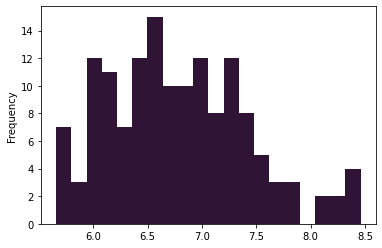

In [39]:
df_mumbai["log_priceMod"] = np.log(df_mumbai.priceMod)
df_mumbai.log_priceMod.plot(kind="hist", bins=20, colormap = 'twilight_shifted_r')

# Question 2

### Build time series model and check the performance of the model using RMSE

In [40]:
df_mumbai_mean = df_mumbai.log_priceMod.mean()
df_mumbai["mean_price"] = np.exp(df_mumbai_mean)
df_mumbai.head()

,market,month,priceMin,priceMax,priceMod,city,date,log_priceMod,mean_price
date,,,,,,,,,
2004-01,MUMBAI,January,719,971,849,MUMBAI,2004-01-01,6.744059,889.100239
2005-01,MUMBAI,January,261,513,387,MUMBAI,2005-01-01,5.958425,889.100239
2006-01,MUMBAI,January,315,488,402,MUMBAI,2006-01-01,5.996452,889.100239
2007-01,MUMBAI,January,866,1136,997,MUMBAI,2007-01-01,6.904751,889.100239
2008-01,MUMBAI,January,348,550,448,MUMBAI,2008-01-01,6.104793,889.100239


<AxesSubplot:xlabel='date'>

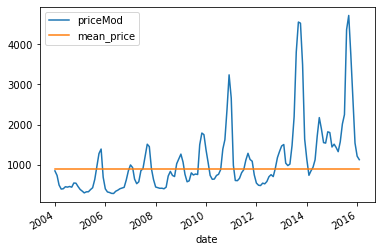

In [69]:
df_mumbai.plot(kind="line", x="date", y=["priceMod", "mean_price"])

In [45]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [46]:
modelRMSE = RMSE(df_mumbai.priceMod, df_mumbai.mean_price)
modelRMSE

908.4772843986449

# Question 3

### ACF and PACF plots

In [52]:
ts = df_mumbai.log_priceMod

In [55]:
lag_acf = acf(ts, nlags=20)
lag_acf

C:\Users\Ambareeshkumar.k\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.31319668,  0.37165336, -0.06140673,  0.16869007,
       -0.02175521,  0.16634997,  0.01127215,  0.10597047, -0.07053858,
        0.27560045,  0.29894124,  0.78300906,  0.35419085,  0.29376392,
       -0.02414901,  0.1003445 ,  0.00663592,  0.1009527 ,  0.02262413,
        0.07107539])

<AxesSubplot:>

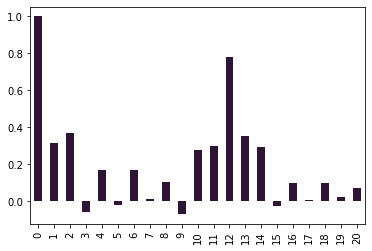

In [68]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar", colormap = 'twilight_shifted_r')

<AxesSubplot:>

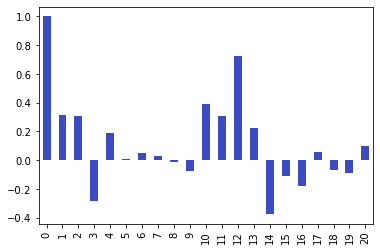

In [65]:
lag_pacf = pacf(ts, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", colormap = 'coolwarm')